##  DataPrep2_InputOutput_regressions
1. Group center respondent answers (19)


2. Add State code to check for location


3. Factor Analysis on 41 Ys and get Happiness index


-GRID Search

4. Run Lasso and select Features. 


5. Run Linear Regression with 10 features. 


6. Interact state and 19 features


7. Run Multilevel


8. Run unpooled regression



In [1]:
# LOAD PACKAGES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sb
color = sb.color_palette()
%matplotlib inline

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr
import plotly.express as px
from factor_analyzer import FactorAnalyzer
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV

from scipy.stats import wilcoxon

In [2]:
# setting working Directory
os.chdir("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Data")
current_path = os.getcwd()
print(current_path)

/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Data


In [16]:
## Load All data
df1= pd.read_csv("data2018.csv", low_memory=False)
df2= pd.read_csv("data2019.csv", low_memory=False)
df3= pd.read_csv("Febr2020o.csv", low_memory=False)
df_state= pd.read_csv("uszips.csv", low_memory=False)
dfmaster= pd.read_csv("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Data/MasterData_new.csv", low_memory=False)
dfmng= pd.read_csv("/Users/Ulkar/Google Drive/DATA SCIENCE/Insight Project/Data/manager.csv", low_memory=False)

In [23]:
dfmaster['WorkZip_master']=(pd.to_numeric(dfmaster['WorkZip_master'], errors='coerce'))

In [ ]:
dfmaster.info

In [25]:
## Merge master data with Zipcode State data
dfmaster2=pd.merge(dfmaster, df_state, how='left',  left_on="WorkZip_master", right_on="zip",  indicator=True)
dfmaster2

,Employee ID,ManagerID,Demographics (Race),Age_master,Female_master,Status_master,Pay type_master,WorkStatus,WorkStatus2_master,CurrentPay_master,...,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode,2019surveycode,zip,state_id,state_name,_merge
0,133267.0,126441.0,White,42.0,1.0,A,H,F,R,44.33,...,NaN,NaN,NaN,NaN,NaN,NaN,2719.0,MA,Massachusetts,both
1,101365.0,126441.0,White,54.0,1.0,T,H,P,T,36,...,NaN,NaN,NaN,NaN,NaN,NaN,2719.0,MA,Massachusetts,both
2,134205.0,126441.0,White,25.0,1.0,A,H,P,R,40.3,...,NaN,NaN,NaN,NaN,NaN,NaN,2719.0,MA,Massachusetts,both
3,124516.0,126441.0,White,52.0,1.0,T,H,P,T,50,...,NaN,NaN,NaN,NaN,NaN,NaN,2719.0,MA,Massachusetts,both
4,126438.0,126441.0,White,49.0,1.0,A,H,P,R,50.38,...,NaN,NaN,NaN,NaN,NaN,NaN,2719.0,MA,Massachusetts,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33928,10215.0,25480.0,White,64.0,1.0,A,H,F,R,16.14,...,"Yes, I have a disability",596876.0,Zuercher10215,Zuercher10215,zuercher10215,zuercher10215,45833.0,OH,Ohio,both
33929,106874.0,10274.0,Hispanic or Latino,20.0,1.0,T,H,P,R,12.32,...,NaN,NaN,Zuniga106874,Zuniga106874,NaN,zuniga106874,45856.0,OH,Ohio,both
33930,127672.0,126441.0,White,30.0,1.0,A,H,F,R,14.21,...,NaN,NaN,NaN,NaN,furtado127672,NaN,2719.0,MA,Massachusetts,both
33931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [27]:
dfmaster2.groupby(["_merge"]).count()

,Employee ID,ManagerID,Demographics (Race),Age_master,Female_master,Status_master,Pay type_master,WorkStatus,WorkStatus2_master,CurrentPay_master,...,DepartmentName,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode,2019surveycode,zip,state_id,state_name
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,3499,3475,2966,3499,3499,3499,3499,2862,2862,3498,...,825,825,840,993,1006,996,1089,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,30432,28782,24041,30432,30431,30432,29790,25626,25626,29728,...,7470,7470,8095,9737,9727,10000,11950,30432,30432,30432


In [28]:
dfmaster=dfmaster2.drop(["_merge"], axis=1) 

# DATA MERGING AND CLEANUP

In [29]:
df2018=pd.merge(df1, dfmaster, how='left',  left_on="survey_code", right_on="Aug2018RespondentID",  indicator=True)
df2019=pd.merge(df2, dfmaster, how='left',  left_on="survey_code", right_on="2019surveycode",  indicator=True)
df2020=pd.merge(df3, dfmaster, how='left',  left_on="survey_code", right_on="Feb2020SurveyCode",  indicator=True)


In [30]:
df2018.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,DepartmentName_y,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode,2019surveycode,zip,state_id,state_name
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,396,396,396,396,396,396,396,396,396,396,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,...,8294,8294,8935,7323,6305,5639,7467,8095,8095,8095


In [31]:
df2019.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,DepartmentName_y,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode,2019surveycode,zip,state_id,state_name
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,18563,18563,18563,18563,18563,18563,18563,18563,18563,18563,...,11414,11414,12415,16715,16931,14242,18563,16915,16915,16915


In [32]:
df2020.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,DepartmentName_y,Disabilities,Aug2018RespondentID,Feb2019SurveyCode,Fall(Aug)2019SurveyCode,Feb2020SurveyCode,2019surveycode,zip,state_id,state_name
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,633,633,633,633,633,633,633,633,633,633,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,10068,10068,10068,10068,10068,10068,10068,10068,10068,10068,...,4946,4946,5402,6827,7992,10068,8163,9154,9154,9154


In [33]:
list(df2020.columns)

['survey_code',
 'submitted',
 'ti_1',
 'ti_2',
 'ti_3',
 'ti_4',
 'ti_5',
 'ti_6',
 'ti_7',
 'ti_8',
 'ti_9',
 'ti_10',
 'ti_11',
 'ti_12',
 'ti_13',
 'ti_14',
 'ti_15',
 'ti_16',
 'ti_17',
 'ti_18',
 'ti_19',
 'ti_20',
 'ti_21',
 'ti_22',
 'ti_23',
 'ti_24',
 'ti_25',
 'ti_26',
 'ti_27',
 'ti_28',
 'ti_29',
 'ti_30',
 'ti_31',
 'ti_32',
 'ti_33',
 'ti_34',
 'ti_35',
 'ti_36',
 'ti_37',
 'ti_38',
 'ti_39',
 'ti_40',
 'ti_41',
 'ti_42',
 'ti_43',
 'ti_44',
 'ti_45',
 'ti_46',
 'ti_47',
 'ti_48',
 'ti_49',
 'ti_50',
 'ti_51',
 'ti_52',
 'ti_53',
 'ti_54',
 'ti_55',
 'ti_56',
 'ti_57',
 'ti_58',
 'ti_59',
 'ti_60',
 'overall_positive',
 'overall_inconsistent',
 'overall_negative',
 'TI 1+',
 'TI 4',
 'TI 5',
 'TI all',
 'TI score',
 'Tenure',
 'WorkStatus_survey',
 'PayType_survey',
 'Female_survey',
 'Race_survey',
 'Age_survey',
 'Hire Date',
 'HireDays',
 'Managerial Level',
 'Confidence in Executive Team_x',
 'Meaningful Innovation Opportunities',
 'ZipCode_survey',
 'LocationName_x'

In [34]:
df2018=df2018.drop(["_merge"], axis=1)
df2019=df2019.drop(["_merge"], axis=1)
df2020=df2020.drop(["_merge"], axis=1)

In [35]:
df2018m=pd.merge(df2018, dfmng, how='left',  left_on="ManagerID", right_on="ManagerID", indicator=True)
df2019m=pd.merge(df2019, dfmng, how='left',  left_on="ManagerID", right_on="ManagerID", indicator=True)
df2020m=pd.merge(df2020, dfmng, how='left',  left_on="ManagerID", right_on="ManagerID", indicator=True)

In [36]:
df2018m.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,Home Zip_m,THSHireDate_m,JobStartDate_m,manager_tenure_month,manager_tenure_month_ths,term_by_feb2020,TerminationDate_m,TerminationReason_m,DepartmentCode_m,DepartmentName_m
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,859,859,859,859,859,859,859,859,859,859,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,8869,8869,8869,8869,8869,8869,8869,8869,8869,8869,...,8075,8075,8075,8075,8075,1266,1266,1215,5502,5502


In [37]:
df2019m.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,Home Zip_m,THSHireDate_m,JobStartDate_m,manager_tenure_month,manager_tenure_month_ths,term_by_feb2020,TerminationDate_m,TerminationReason_m,DepartmentCode_m,DepartmentName_m
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,2002,2002,2002,2002,2002,2002,2002,2002,2002,2002,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,18951,18951,18951,18951,18951,18951,18951,18951,18951,18951,...,16561,16561,16561,16561,16561,1729,1729,1647,11024,11024


In [38]:
df2020m.groupby(["_merge"]).count()

,survey_code,submitted,ti_1,ti_2,ti_3,ti_4,ti_5,ti_6,ti_7,ti_8,...,Home Zip_m,THSHireDate_m,JobStartDate_m,manager_tenure_month,manager_tenure_month_ths,term_by_feb2020,TerminationDate_m,TerminationReason_m,DepartmentCode_m,DepartmentName_m
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,10167,10167,10167,10167,10167,10167,10167,10167,10167,10167,...,8901,8901,8901,8901,8901,593,593,562,5701,5701


In [39]:
df2018m.shape

(9728, 150)

In [40]:
df2019m.shape

(20953, 152)

In [41]:
df2020m.shape

(11334, 150)

In [42]:
data_all=pd.concat([df2018m, df2019m, df2020m])  ## put all survey together
data_all=data_all[data_all["_merge"]=="both"] ## save only matched columns

In [43]:
list(data_all.columns)

['survey_code',
 'submitted',
 'ti_1',
 'ti_2',
 'ti_3',
 'ti_4',
 'ti_5',
 'ti_6',
 'ti_7',
 'ti_8',
 'ti_9',
 'ti_10',
 'ti_11',
 'ti_12',
 'ti_13',
 'ti_14',
 'ti_15',
 'ti_16',
 'ti_17',
 'ti_18',
 'ti_19',
 'ti_20',
 'ti_21',
 'ti_22',
 'ti_23',
 'ti_24',
 'ti_25',
 'ti_26',
 'ti_27',
 'ti_28',
 'ti_29',
 'ti_30',
 'ti_31',
 'ti_32',
 'ti_33',
 'ti_34',
 'ti_35',
 'ti_36',
 'ti_37',
 'ti_38',
 'ti_39',
 'ti_40',
 'ti_41',
 'ti_42',
 'ti_43',
 'ti_44',
 'ti_45',
 'ti_46',
 'ti_47',
 'ti_48',
 'ti_49',
 'ti_50',
 'ti_51',
 'ti_52',
 'ti_53',
 'ti_54',
 'ti_55',
 'ti_56',
 'ti_57',
 'ti_58',
 'ti_59',
 'ti_60',
 'overall_positive',
 'overall_inconsistent',
 'overall_negative',
 'TI 1+',
 'TI 4',
 'TI 5',
 'TI all',
 'TI score',
 'Tenure',
 'WorkStatus_survey',
 'PayType_survey',
 'Female_survey',
 'Race_survey',
 'Age_survey',
 'Hire Date',
 'HireDays',
 'Managerial Level',
 'Confidence in Executive Team_x',
 'Meaningful Innovation Opportunities',
 'ZipCode_survey',
 'LocationName_x'

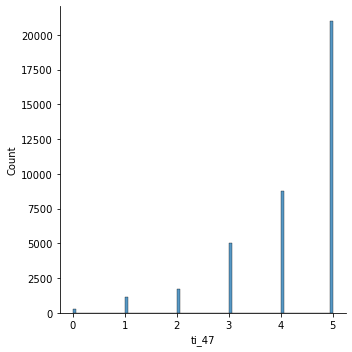

In [313]:
sb.displot(data_all['ti_47'])

## FEATURE Engineering

In [44]:
# Turn Current Pay into float
data_all['CurrentPay_m']=(pd.to_numeric(data_all['CurrentPay_m'], errors='coerce'))
data_all['CurrentPay_master']=(pd.to_numeric(data_all['CurrentPay_master'], errors='coerce'))

# Replace missing values with median (if skewed) and mean value
data_all['CurrentPay_m'].fillna(data_all['CurrentPay_m'].mean(), inplace=True)
data_all['CurrentPay_master'].fillna(data_all['CurrentPay_master'].median(), inplace=True)



### Check the distribution

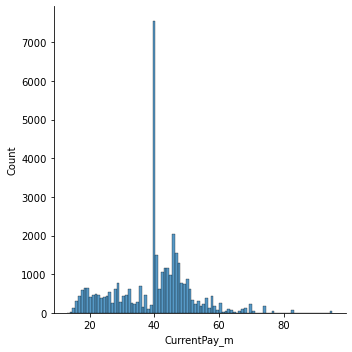

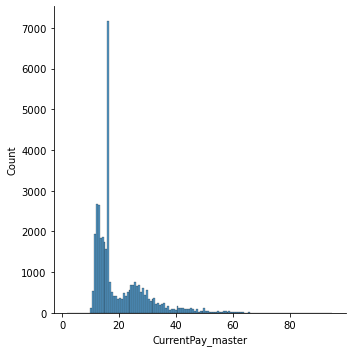

In [45]:
sb.displot(data_all['CurrentPay_m'])
sb.displot(data_all['CurrentPay_master'])

In [46]:
#data_all['CurrentPay_m_logged']=np.log(data_all['CurrentPay_m'])
data_all['CurrentPay_master_logged']=np.log(data_all['CurrentPay_master'])

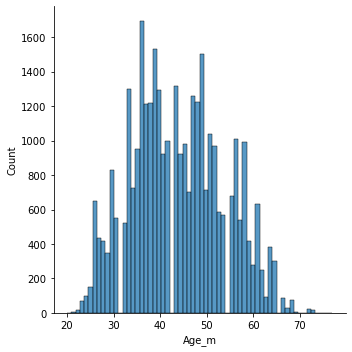

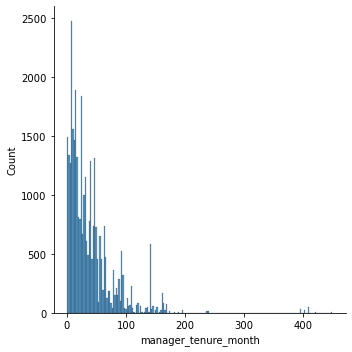

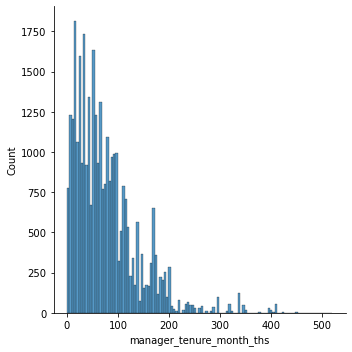

In [47]:
# Transform Age and Tenure to float objects
data_all['Age_m']=(pd.to_numeric(data_all['Age_m'], errors='coerce'))
data_all['manager_tenure_month']=(pd.to_numeric(data_all['manager_tenure_month'], errors='coerce'))
data_all['manager_tenure_month_ths']=(pd.to_numeric(data_all['manager_tenure_month_ths'], errors='coerce'))

# Examine distribution
sb.displot(data_all['Age_m'])
sb.displot(data_all['manager_tenure_month'])
sb.displot(data_all['manager_tenure_month_ths'])

## Tenure is very positively sckewed. Fill missing values with median and log transform

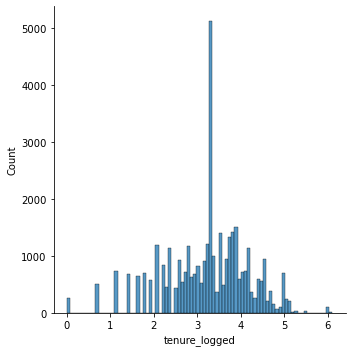

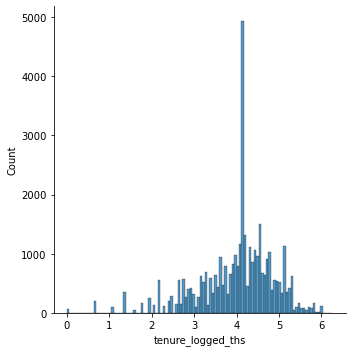

In [48]:
# fill in missing values for Age and Tenure
data_all['Age_m'].fillna(data_all['Age_m'].mean(), inplace=True)
data_all['manager_tenure_month'].fillna(data_all['manager_tenure_month'].median(), inplace=True)
data_all['manager_tenure_month_ths'].fillna(data_all['manager_tenure_month_ths'].median(), inplace=True)

# Log transfor tenure. (+1 to avoid dealing with zero log)
data_all['tenure_logged']=np.log(data_all['manager_tenure_month']+1)
data_all['tenure_logged_ths']=np.log(data_all['manager_tenure_month_ths']+1)
sb.displot(data_all['tenure_logged'])
sb.displot(data_all['tenure_logged_ths'])

In [49]:
# Check location of missing values
data_all.loc[(data_all['Female_m'].isnull()) | (data_all['Race_m'].isnull())]

# Drop rows with missing Female and Race values
data_all2 = data_all[pd.notnull(data_all['Female_m'])]
data_all2 = data_all2[pd.notnull(data_all2['Race_m'])]

## Managers only with 5 and more reports

In [50]:
# Aggregate for manager and each survey
count_mng=data_all2.groupby(['ManagerID', 'SurveyYear', 'SurveyMonth']).count()

# Drop those that have less than 5 reports
count_mng=count_mng[count_mng["survey_code"]>=5]

index1 = pd.MultiIndex.from_arrays([data_all2[col] for col in ['ManagerID', 'SurveyYear', 'SurveyMonth']])

# Keep only managers that have 5+ reports in the main dataset
data_all3=data_all2.loc[index1.isin(count_mng.index)]

In [51]:
# Create dataset of questions
quest60=data_all3.iloc[:, 2:62]

x_man_quest=data_all3[["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
                    "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]]

y_quest=data_all3[["ti_1", "ti_2", "ti_3", "ti_4", "ti_5", "ti_8", "ti_10", "ti_11", "ti_12", "ti_16", "ti_17", "ti_23",
                    "ti_25", "ti_26", "ti_27", "ti_28", "ti_29", "ti_30", "ti_32", "ti_33", "ti_35", "ti_36", "ti_37", "ti_38",
                "ti_40", "ti_41", "ti_42", "ti_44", "ti_45", "ti_48", "ti_49", "ti_50", "ti_51", "ti_52", "ti_53", "ti_55", "ti_56", 
                "ti_57", "ti_58", "ti_59", "ti_60"]]

In [52]:
list(data_all3.columns)

['survey_code',
 'submitted',
 'ti_1',
 'ti_2',
 'ti_3',
 'ti_4',
 'ti_5',
 'ti_6',
 'ti_7',
 'ti_8',
 'ti_9',
 'ti_10',
 'ti_11',
 'ti_12',
 'ti_13',
 'ti_14',
 'ti_15',
 'ti_16',
 'ti_17',
 'ti_18',
 'ti_19',
 'ti_20',
 'ti_21',
 'ti_22',
 'ti_23',
 'ti_24',
 'ti_25',
 'ti_26',
 'ti_27',
 'ti_28',
 'ti_29',
 'ti_30',
 'ti_31',
 'ti_32',
 'ti_33',
 'ti_34',
 'ti_35',
 'ti_36',
 'ti_37',
 'ti_38',
 'ti_39',
 'ti_40',
 'ti_41',
 'ti_42',
 'ti_43',
 'ti_44',
 'ti_45',
 'ti_46',
 'ti_47',
 'ti_48',
 'ti_49',
 'ti_50',
 'ti_51',
 'ti_52',
 'ti_53',
 'ti_54',
 'ti_55',
 'ti_56',
 'ti_57',
 'ti_58',
 'ti_59',
 'ti_60',
 'overall_positive',
 'overall_inconsistent',
 'overall_negative',
 'TI 1+',
 'TI 4',
 'TI 5',
 'TI all',
 'TI score',
 'Tenure',
 'WorkStatus_survey',
 'PayType_survey',
 'Female_survey',
 'Race_survey',
 'Age_survey',
 'Hire Date',
 'HireDays',
 'Managerial Level',
 'Confidence in Executive Team_x',
 'Meaningful Innovation Opportunities',
 'ZipCode_survey',
 'LocationName_x'

In [225]:
data_all3['state_name'].unique()

array(['Kentucky', 'Indiana', 'Ohio', 'Michigan', nan, 'Tennessee',
       'New Mexico', 'Pennsylvania', 'Illinois', 'Massachusetts',
       'Connecticut'], dtype=object)

In [53]:
## Create dictionary of Locations
data_all3.Location = data_all3['LocationName_y'].map(str.strip)
all_locations = data_all3.Location.unique()
locations = len(all_locations)
location_lookup = dict(zip(all_locations, range(locations)))



<ipython-input-53-0cefe09ecdd1>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_all3.Location = data_all3['LocationName_y'].map(str.strip)


In [ ]:
location_lookup 

In [ ]:
# Check the skewness of survey responses
skewv=quest60.skew(axis=0)
sb.scatterplot(data=skewv)

# All questions are negatively skewed. 

# PART 1. Creating input variables

## GROUP CENTERING DATA

In [ ]:

data_all3['Survey_no'] = 0
data_all3.loc[(data_all3['SurveyYear']==2018) & (data_all3['SurveyMonth']==8),'Survey_no'] = 1
data_all3.loc[(data_all3['SurveyYear']==2019) & (data_all3['SurveyMonth']==3),'Survey_no'] = 2
data_all3.loc[(data_all3['SurveyYear']==2019) & (data_all3['SurveyMonth']==8),'Survey_no'] = 3
data_all3.loc[(data_all3['SurveyYear']==2020) & (data_all3['SurveyMonth']==2),'Survey_no'] = 4


In [64]:
# Group Centering all 60 questions
temp_data=data_all3[['ManagerID','Survey_no']]

temp_data=pd.concat([temp_data, quest60], axis=1)
means = temp_data.groupby(['ManagerID', 'Survey_no']).transform('mean')
temp_data2 = temp_data - means


In [71]:
quest60_2=temp_data2.iloc[:, 2:62]
quest60_2.columns

Index(['ti_1', 'ti_10', 'ti_11', 'ti_12', 'ti_13', 'ti_14', 'ti_15', 'ti_16',
       'ti_17', 'ti_18', 'ti_19', 'ti_2', 'ti_20', 'ti_21', 'ti_22', 'ti_23',
       'ti_24', 'ti_25', 'ti_26', 'ti_27', 'ti_28', 'ti_29', 'ti_3', 'ti_30',
       'ti_31', 'ti_32', 'ti_33', 'ti_34', 'ti_35', 'ti_36', 'ti_37', 'ti_38',
       'ti_39', 'ti_4', 'ti_40', 'ti_41', 'ti_42', 'ti_43', 'ti_44', 'ti_45',
       'ti_46', 'ti_47', 'ti_48', 'ti_49', 'ti_5', 'ti_50', 'ti_51', 'ti_52',
       'ti_53', 'ti_54', 'ti_55', 'ti_56', 'ti_57', 'ti_58', 'ti_59', 'ti_6',
       'ti_60', 'ti_7', 'ti_8', 'ti_9'],
      dtype='object')

count    2.885700e+04
mean    -1.822094e-17
std      9.974247e-01
min     -4.681818e+00
25%     -4.545455e-01
50%      2.307692e-01
75%      6.551724e-01
max      3.200000e+00
Name: ti_47, dtype: float64

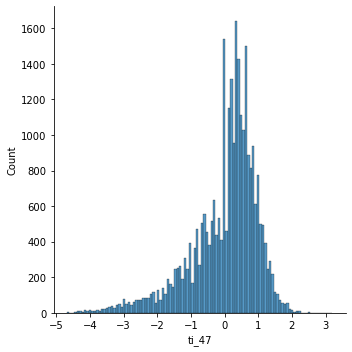

In [314]:
# Plot for question 6
sb.displot(quest60_2['ti_47'])  # average
quest60_2['ti_47'].describe()

In [198]:
x_man_quest=quest60_2[["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
                    "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]]


In [199]:
x_man_quest

,ti_6,ti_7,ti_9,ti_13,ti_14,ti_15,ti_18,ti_19,ti_20,ti_21,ti_22,ti_24,ti_31,ti_34,ti_39,ti_43,ti_46,ti_47,ti_54
0,0.222222,0.222222,0.333333,0.333333,0.222222,0.333333,0.111111,0.222222,0.333333,0.444444,0.444444,0.444444,0.222222,0.555556,0.444444,0.222222,0.333333,0.222222,0.444444
1,-0.800000,0.000000,0.000000,0.000000,-0.800000,-0.800000,-0.800000,-0.800000,-1.600000,-0.800000,-1.600000,-1.600000,0.000000,-0.800000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.200000,0.200000,0.200000,0.200000,0.300000,0.300000,0.400000,0.200000,0.300000,0.300000,0.400000,0.200000,0.200000,0.300000,0.500000,0.200000,0.500000,0.300000,0.600000
5,-1.875000,-1.000000,-2.125000,-1.500000,-1.375000,-0.625000,-0.625000,-1.125000,-1.250000,-1.750000,-1.500000,-2.250000,-1.000000,-1.250000,-0.625000,-0.625000,-0.375000,-0.500000,-0.500000
7,-0.333333,0.500000,0.333333,0.333333,-0.666667,-3.833333,-0.333333,0.166667,0.500000,-0.166667,0.333333,-0.166667,0.333333,0.333333,0.333333,0.333333,0.166667,0.166667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11327,-1.024390,-2.780488,-2.804878,-3.048780,-1.121951,-2.634146,-2.658537,-1.829268,-1.536585,-2.390244,-2.170732,-2.292683,-2.731707,-2.585366,0.463415,-3.024390,-3.146341,-2.780488,-2.000000
11328,-0.194444,-0.111111,-1.111111,-0.222222,-0.194444,-1.111111,-1.944444,-1.222222,-0.416667,-3.138889,-0.805556,-0.166667,-1.000000,-0.972222,0.666667,0.611111,0.722222,-1.194444,-1.277778
11329,0.461538,-0.461538,0.384615,0.153846,0.461538,-0.384615,0.538462,0.461538,0.230769,0.769231,0.692308,0.615385,-0.230769,0.692308,0.461538,0.615385,0.384615,0.461538,0.538462
11332,0.714286,1.000000,1.142857,1.142857,1.000000,1.142857,1.000000,1.000000,1.142857,1.000000,1.000000,1.285714,1.285714,0.857143,0.714286,1.000000,1.000000,1.285714,1.142857


# PART 2. Creating Y variable

## Factor analysis with 41 survey responses

In [73]:
## Factor Adequcy test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(y_quest)
chi_square_value, p_value

(1006828.1470279451, 0.0)

In [74]:
# KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(y_quest)
kmo_model
#0.99  This value indicates that you can proceed with your planned factor analysis.

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.9914144142733702

[23.75742228  1.37417903  1.02928488  0.86178106  0.77822821  0.75070015
  0.63823722  0.58127127  0.54142308  0.51377016  0.49476705  0.47265638
  0.45316951  0.44199174  0.42435609  0.41513377  0.40015291  0.38371694
  0.37530905  0.36858936  0.36297212  0.34938978  0.3432485   0.33490774
  0.32515495  0.32007077  0.31036618  0.30713698  0.30267488  0.29546396
  0.28646453  0.2854251   0.27652523  0.26698189  0.24643766  0.24302491
  0.23075291  0.22909111  0.22053377  0.2055564   0.20168049]


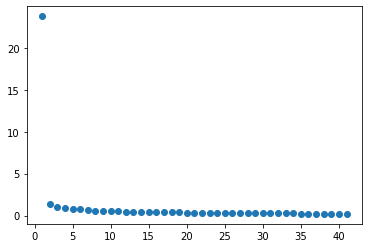

In [75]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None, n_factors=20)
fa.fit(y_quest)
ev, v = fa.get_eigenvalues()  # for eigen values
plt.scatter(range(1,y_quest.shape[1]+1),ev)
print(ev)  # only three factors arabove 1, so run analysis with 3 factors and get the factor loadings.  


In [81]:
# factor analysis with three factors
fa_y = FactorAnalyzer(n_factors=3, rotation='varimax')
y_quest_transformed=fa_y.fit_transform(y_quest)

#Create the factors
# Depends on which questions load into which factors
# Many iterations showed that question loadings do not change much
#factor1 = quest60[["ti_3", "ti_4", "ti_5", "ti_10", "ti_12", "ti_26", "ti_28", "ti_29", "ti_40"]]
happiness_f = y_quest[["ti_37", "ti_48", "ti_51", "ti_53", "ti_55", "ti_60" ]]
#fair_treatment = quest60[["ti_27","ti_32", "ti_36", "ti_42"]]
happiness_y=y_quest_transformed[:, 1]

#loads = fa_y.loadings_
#print(loads)

In [316]:
fa_y.get_factor_variance()

(array([10.58262935,  8.44380655,  6.03186785]),
 array([0.25811291, 0.2059465 , 0.14711873]),
 array([0.25811291, 0.46405941, 0.61117814]))

In [82]:
happiness_y.shape

(28857,)

In [83]:
data_all3['happiness_y']=happiness_y

<ipython-input-83-40e905664eee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all3['happiness_y']=happiness_y


# Part3:  Create Manager level demographic variables dataset

In [93]:
mng_demog=data_all3[["ManagerID", "Survey_no", "Location Name_m", "Race_m", "state_id", "Status_m", "Work Status_m", 
                     "Female_m","Age_m",  "tenure_logged", 'tenure_logged_ths', "CurrentPay_m", ]]

mng_demog_df=pd.DataFrame(mng_demog)
mng_demog_df.reset_index(inplace=True)

#mng_demog_df.to_csv("manager_demog.csv", index=False)

## Check distribution of Redpondent level Happiness Index

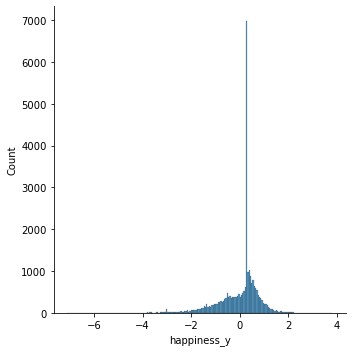

In [94]:
sb.displot(data_all3['happiness_y'])

## Check distribution of Manager level demographics

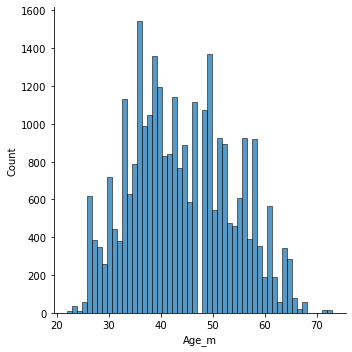

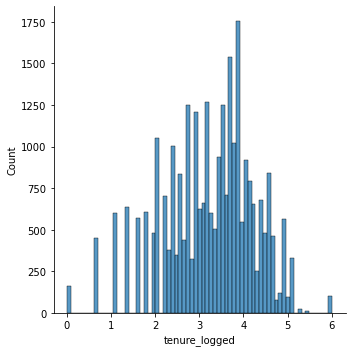

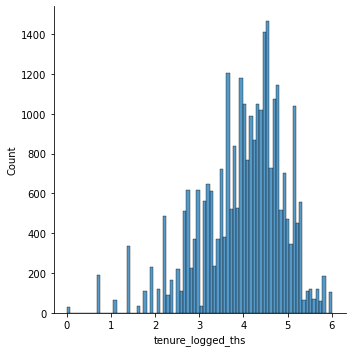

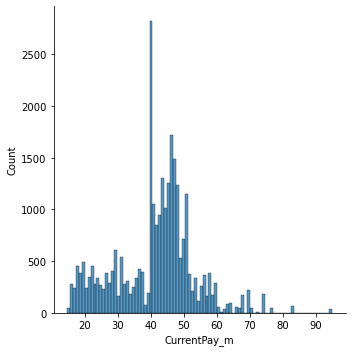

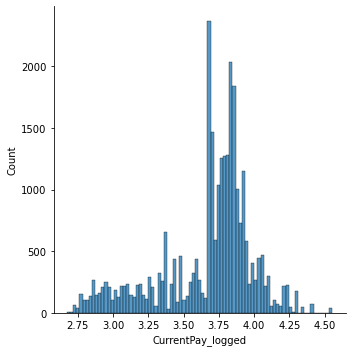

In [95]:
sb.displot(mng_demog_df['Age_m'])  # Age is normally distributed. 

sb.displot(mng_demog_df['tenure_logged']) # tenure also normally distributed
sb.displot(mng_demog_df['tenure_logged_ths'])
sb.displot(mng_demog_df['CurrentPay_m'])   # log transform needed

sb.displot(mng_demog_df['CurrentPay_logged'])

## SCALE all variables

In [210]:
## All the necessary variables are created. 

# 1. Scale Manager Level Demographic data
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#mng_demog_df['CurrentPay_logged']=sc.fit_transform(mng_demog_df['CurrentPay_logged'].values.reshape(-1,1))
#mng_demog_df['tenure_logged']=sc.fit_transform(mng_demog_df['tenure_logged'].values.reshape(-1,1))
#mng_demog_df['tenure_logged_ths']=sc.fit_transform(mng_demog_df['tenure_logged_ths'].values.reshape(-1,1))
#mng_demog_df['Age_m']=sc.fit_transform(mng_demog_df['Age_m'].values.reshape(-1,1))


  ## Encodong categorial variables
#mng_demog_df=pd.get_dummies(mng_demog_df, columns=['Race_m', "Status_m", "Work Status_m", "state_id" ], 
                            #prefix=['race', 'status', 'ws', 'state'], drop_first=True)
 ## Mean Encode Race.
from category_encoders import TargetEncoder
xx_r=data_all3[['Race_m']]
yy_r=data_all3[['happiness_y']]
 
mean_ec = TargetEncoder(cols=['Race_m'])
Race_ec=mean_ec.fit_transform(xx_r, yy_r)



#2. Scale input features
#x_man_quest_sc=pd.DataFrame(sc.fit_transform(x_man_quest))  # This strips names of columns. So add column names back

#x_man_quest_sc.columns=["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
                   # "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]


#3. Scale output (happiness feature) Already within -3 and 3. 
#data_all3['happiness_y']=sc.fit_transform(data_all3['happiness_y'].values.reshape(-1,1))

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [217]:
Race_ec=Race_ec.reset_index(drop=True)

## Check correlation between Questions (mean centered).

In [202]:
corMat=x_man_quest_sc.corr()
mean_corr=corMat.mean()
#mean_corr.hist()
#corr_desc=corMat.nlargest(10,0)
mean_corr

ti_6     0.668493
ti_7     0.676093
ti_9     0.670904
ti_13    0.684161
ti_14    0.664516
ti_15    0.702764
ti_18    0.665840
ti_19    0.682996
ti_20    0.606494
ti_21    0.682947
ti_22    0.663618
ti_24    0.677021
ti_31    0.708683
ti_34    0.717629
ti_39    0.535639
ti_43    0.680179
ti_46    0.674996
ti_47    0.684017
ti_54    0.640114
dtype: float64

In [ ]:
# CHECK location specific variables and save as dataset
len(mng_demog_df['Location Name_m'].unique())
count_loc=mng_demog_df.groupby(['Location Name_m']).count()
count_loc


In [219]:
## MERGING ALL INTO ONE FILE

datas=pd.concat([mng_demog_df,x_man_quest_sc], axis=1)
datas2=pd.concat([mng_demog_df, Race_ec, x_man_quest_sc], axis=1)  # with target encoding

In [ ]:
##sb.catplot(x="state_id", y="ti_47", data=data_all3, s = 2, kind = "swarm")
# TAKES VERY LONG RUN ONLY IF NEEDED

In [221]:
datas2.columns

Index(['index', 'ManagerID', 'Survey_no', 'Location Name_m', 'Female_m',
       'Age_m', 'tenure_logged', 'tenure_logged_ths', 'CurrentPay_m',
       'CurrentPay_logged', 'race_Asian', 'race_Black or African American',
       'race_Hispanic or Latino', 'race_Two or More Races', 'race_White',
       'status_D', 'status_L', 'status_P', 'status_T', 'ws_P', 'state_IL',
       'state_IN', 'state_KY', 'state_MA', 'state_MI', 'state_NM', 'state_OH',
       'state_PA', 'state_TN', 'Race_m', 'ti_6', 'ti_7', 'ti_9', 'ti_13',
       'ti_14', 'ti_15', 'ti_18', 'ti_19', 'ti_20', 'ti_21', 'ti_22', 'ti_24',
       'ti_31', 'ti_34', 'ti_39', 'ti_43', 'ti_46', 'ti_47', 'ti_54'],
      dtype='object')

# PART 4 REGRESSION

In [227]:
x_19=datas[["ti_6", "ti_7", "ti_9", "ti_13", "ti_14", "ti_15", "ti_18", "ti_19", "ti_20", "ti_21", "ti_22", "ti_24", "ti_31",
                    "ti_34", "ti_39", "ti_43", "ti_46", "ti_47", "ti_54"]]
x_demog=datas[["Female_m", "Age_m", "tenure_logged", "tenure_logged_ths", "CurrentPay_m", 'race_Black or African American',
                   'race_Hispanic or Latino', 'race_Two or More Races', 'race_White',
                   'status_D', 'status_L', 'status_P', 'status_T', 'ws_P', 'state_IL',
               'state_IN','state_KY','state_MA','state_MI','state_NM','state_OH','state_PA','state_TN']]

x_demog2=datas2[["Female_m", "Age_m", "tenure_logged", "tenure_logged_ths", "CurrentPay_m", "Race_m",
                   'status_D', 'status_L', 'status_P', 'status_T', 'ws_P', 'state_IL',
               'state_IN','state_KY','state_MA','state_MI','state_NM','state_OH','state_PA','state_TN']]

x_19_demog=pd.concat([x_19, x_demog], axis=1)
x_19_demog2=pd.concat([x_19, x_demog2], axis=1)

y=data_all3['happiness_y']

In [307]:
x_19_demog2

,ti_6,ti_7,ti_9,ti_13,ti_14,ti_15,ti_18,ti_19,ti_20,ti_21,...,ws_P,state_IL,state_IN,state_KY,state_MA,state_MI,state_NM,state_OH,state_PA,state_TN
0,0.237072,2.284805e-01,3.359489e-01,3.508699e-01,0.241501,0.338362,0.110809,0.234814,0.392348,0.426000,...,0,0,0,1,0,0,0,0,0,0
1,-0.853460,3.544286e-18,-3.226093e-18,1.555097e-18,-0.869404,-0.812069,-0.797824,-0.845332,-1.883271,-0.766800,...,0,0,0,1,0,0,0,0,0,0
2,0.213365,2.056325e-01,2.015694e-01,2.105219e-01,0.326027,0.304526,0.398912,0.211333,0.353113,0.287550,...,0,0,0,1,0,0,0,0,0,0
3,-2.000297,-1.028162e+00,-2.141674e+00,-1.578914e+00,-1.494289,-0.634429,-0.623300,-1.188748,-1.471306,-1.677376,...,0,0,0,1,0,0,0,0,0,0
4,-0.355608,5.140812e-01,3.359489e-01,3.508699e-01,-0.724504,-3.891163,-0.332427,0.176111,0.588522,-0.159750,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28852,-1.092845,-2.858793e+00,-2.826887e+00,-3.209175e+00,-1.219287,-2.673885,-2.651305,-1.932923,-1.808629,-2.291050,...,0,0,0,0,0,1,0,0,0,0
28853,-0.207438,-1.142403e-01,-1.119830e+00,-2.339132e-01,-0.211314,-1.127873,-1.939155,-1.291479,-0.490435,-3.008626,...,0,0,1,0,0,0,0,0,0,0
28854,0.492381,-4.745365e-01,3.876334e-01,1.619399e-01,0.501580,-0.390418,0.536997,0.487691,0.271626,0.737308,...,0,0,1,0,0,0,0,0,0,0
28855,0.762018,1.028162e+00,1.151825e+00,1.202982e+00,1.086756,1.160098,0.997280,1.056665,1.345194,0.958500,...,0,0,0,0,0,0,0,1,0,0


# GRID SEARCH

In [228]:
# grid search linear regression model respondent level dataset insurance dataset
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# define model
x = x_19_demog2
y = y
model = Ridge()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)

# execute search
result = search.fit(x, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.31742587268779127
Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'sag'}


## RUN LASSO FOR FEATURE SELECTION

In [139]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [231]:



x_lasso = x_19_demog2
y_lasso = y

train_number = 10000


# before loop
test_r_squared = np.zeros((train_number,1))
train_r_squared = np.zeros((train_number,1))
lasso_alpha = np.zeros((train_number,1))
lasso_coef = np.zeros((train_number, x_lasso.shape[1]))


for trialNo in range(train_number):
    
    #SAMPLE SPLIT: 75-25
    x_lasso_train, x_lasso_test, y_lasso_train, y_lasso_test = train_test_split(x_lasso, y_lasso, test_size=0.25)

    reg = LassoCV(cv=5).fit(x_lasso_train, y_lasso_train)

    YpredLasso = reg.predict(x_lasso_test)
    YpredLasso_train = reg.predict(x_lasso_train)
    
    test_r_squared[trialNo] = r2_score(y_lasso_test, YpredLasso)
    train_r_squared[trialNo] = r2_score(y_lasso_train, YpredLasso_train)
    lasso_coef[trialNo,:] = reg.coef_ 



/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


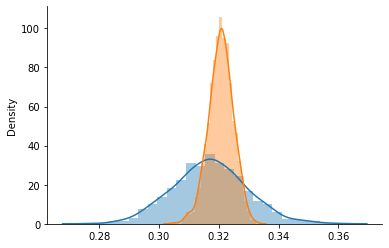

In [232]:
#Distribution of R-squared for test and train set
test_r_squared_df=pd.DataFrame(data=test_r_squared)
test_r_squared_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

train_r_squared_df=pd.DataFrame(data=train_r_squared)
train_r_squared_df.rename(columns = {0:'coefficient of determination_train'}, inplace = True) 

sb.distplot(test_r_squared_df)
sb.despine()
sb.distplot(train_r_squared_df)
sb.despine()

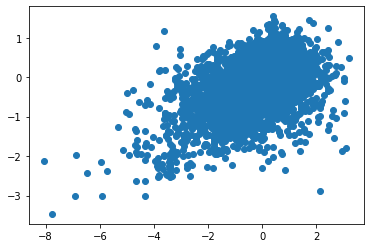

In [234]:
plt.scatter(YCV_test, YpredLassoCV)

### Check top features

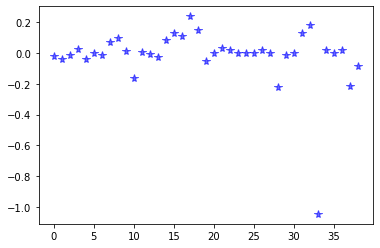

In [239]:
lasso_coef_df = pd.DataFrame(data=lasso_coef)

mean_coef=lasso_coef_df.mean()

plt.plot(mean_coef,alpha=0.6,linestyle='none',marker='*',markersize=8,color='blue') 

In [240]:
abs_mean_coef=abs(mean_coef)
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef.index

Int64Index([33, 17, 28, 37, 32, 10, 18, 15, 31, 16,  8, 14, 38,  7, 19,  4,  1,
            21, 13,  3, 36, 26, 34,  0, 22,  6,  9,  2, 29, 12, 11, 24, 20, 23,
            27,  5, 35, 30, 25],
           dtype='int64')

## RUN REGRESSION WITH TOP FEATURES

In [242]:
# GET ONLY 10 features.


all_x = x_19_demog2

features_number = 10
#get the top n features
top_coef=abs_mean_coef.sort_values(ascending=False)

lasso10_features = all_x.iloc[:,top_coef.index[0]]

for features in range(features_number-1):
    lasso10_features = pd.concat([lasso10_features, all_x.iloc[:,top_coef.index[features+1]]], axis = 1)

    
x_linear = lasso10_features
y_linear = y

train_number = 10000

#initialize
linear_r_squared = np.zeros((train_number,1))
linear_r_squared_train = np.zeros((train_number,1))
linear_coef = np.zeros((train_number,x_linear.shape[1]))

for trialNo in range(train_number):
    
    #split Test and Train set 0.25 %
    xlin_train, xlin_test, ylin_train, ylin_test = train_test_split(x_linear, y_linear, test_size=0.25)
    
    linear_reg = linear_model.LinearRegression()
    
    model = linear_reg.fit(xlin_train, ylin_train)
    
    Ypred_lin_train = linear_reg.predict(xlin_train)
    Ypred_lin = linear_reg.predict(xlin_test)
    
    linear_r_squared_train[trialNo] = r2_score(ylin_train, Ypred_lin_train)
    linear_r_squared[trialNo] = r2_score(ylin_test, Ypred_lin)
    linear_coef[trialNo,:] = linear_reg.coef_

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


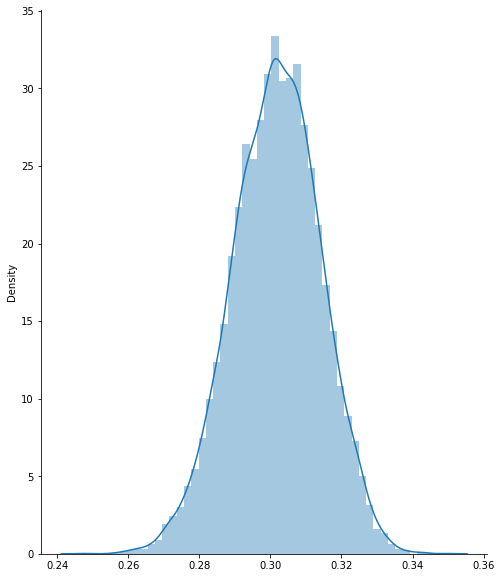

In [315]:
#Distribution of R-squared
r2_df=pd.DataFrame(data=linear_r_squared)
r2_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

r2_df_train=pd.DataFrame(data=linear_r_squared_train)
r2_df_train.rename(columns = {0:'coefficient of determination_train'}, inplace = True) 

#sb.distplot(r2_df_train)
#sb.despine()
sb.distplot(r2_df)
sb.despine()

In [244]:
r2=linear_r_squared.mean()
print(r2)

0.3017266225055484


### PLOT PREDICTION AGAINS ACTUAL VALUES

Text(0.5, 1.0, 'Employee Satisfaction')

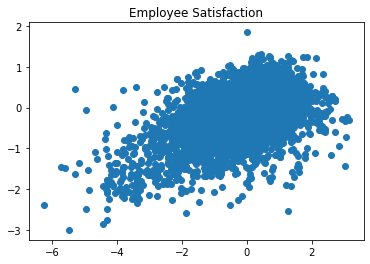

In [250]:
plt.scatter(Yl_test, Ypredl)
plt.title("Employee Satisfaction")

plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")

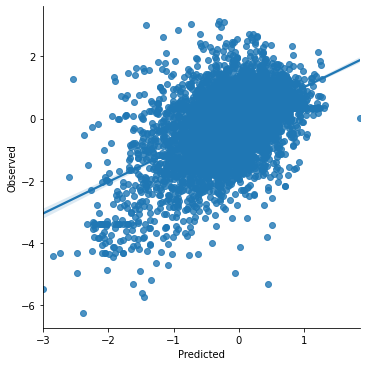

In [255]:

plot_pred = pd.DataFrame({'Observed': Yl_test, 'Predicted': Ypredl})
sb.lmplot(x='Predicted', y='Observed', data=plot_pred)


In [309]:
mean_linear_coef

0   -1.217908
1    0.259232
2   -0.234694
3   -0.324787
4    0.171517
5   -0.151328
6    0.168046
7    0.162013
8    0.105919
9    0.140279
dtype: float64

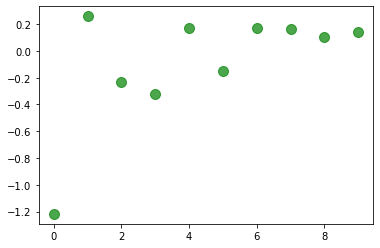

In [256]:
#Average weight of the coefficient for each feature
linear_coef_df = pd.DataFrame(data=linear_coef)

mean_linear_coef=linear_coef_df.mean()

plt.plot(mean_linear_coef,alpha=0.7,linestyle='none',marker='o',markersize=10,color='green') 

In [283]:
abs_mean_coef=(mean_linear_coef)
top_coef=abs_mean_coef.sort_values(ascending=False)
top_coef


0    1.217908
3    0.324787
1    0.259232
2    0.234694
4    0.171517
6    0.168046
7    0.162013
5    0.151328
9    0.140279
8    0.105919
dtype: float64

In [320]:
mean_linear_coef

0   -1.217908
1    0.259232
2   -0.234694
3   -0.324787
4    0.171517
5   -0.151328
6    0.168046
7    0.162013
8    0.105919
9    0.140279
dtype: float64

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


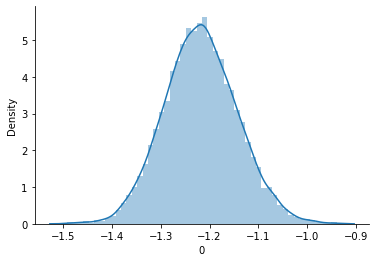

In [259]:
#Distribution of coefficients for the top feature (STATe.)
sb.distplot(linear_coef_df.iloc[:,0]).set_title('MA')
sb.despine()

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


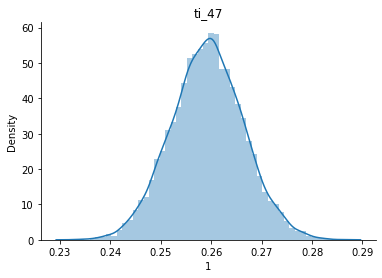

In [262]:
#Distribution of coefficients for the top feature (Management shows a sincere interest in me as a person, not just an employee..)
sb.distplot(linear_coef_df.iloc[:,1],  color="g").set_title('Management shows a sincere interest in me as a person, not just an employee.')  
sb.despine()

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


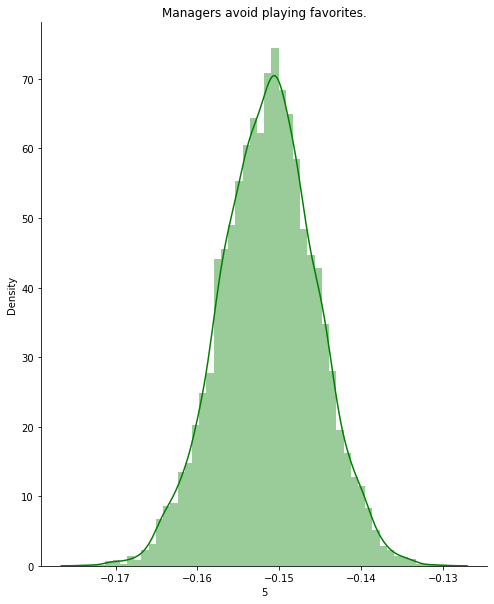

In [308]:
sb.distplot(linear_coef_df.iloc[:,5], color="g").set_title('Managers avoid playing favorites.')
sb.despine()


/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


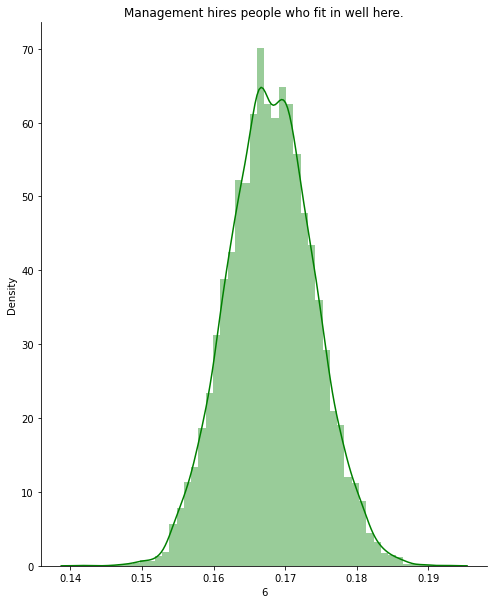

In [310]:
sb.distplot(linear_coef_df.iloc[:,6], color="g").set_title('Management hires people who fit in well here.')
sb.despine()

/Users/Ulkar/opt/anaconda3/envs/insight/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


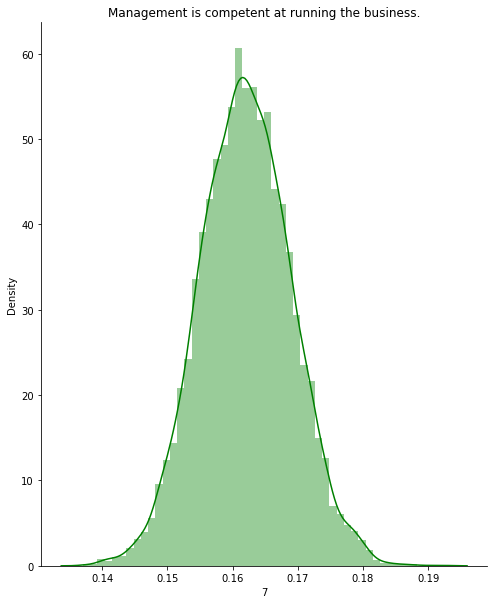

In [311]:
sb.distplot(linear_coef_df.iloc[:,7], color="g").set_title('Management is competent at running the business.')
sb.despine()

In [305]:
coef

1    0.259232
4    0.171517
6    0.168046
7    0.162013
9    0.140279
8    0.105919
5   -0.151328
2   -0.234694
3   -0.324787
0   -1.217908
dtype: float64

Text(0.5, 1.0, 'Feature Importance')

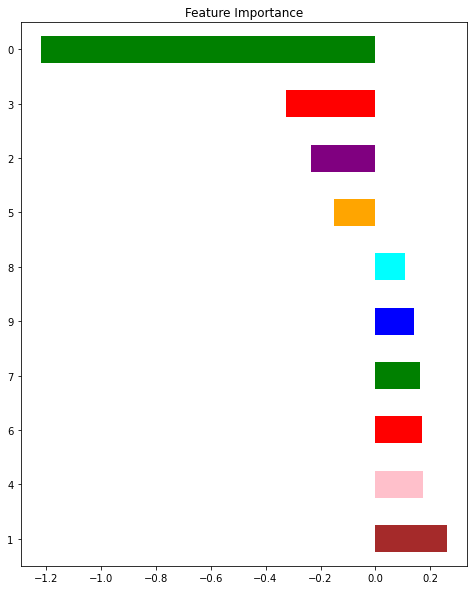

In [304]:
my_colors = ['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple', 'red', 'green']
coef= mean_linear_coef
coef=coef.sort_values(ascending=False)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
coef.plot(kind = "barh", color=my_colors)
plt.title("Feature Importance")

## RANDOM FOREST

Feature: 0, Score: 0.00700
Feature: 1, Score: 0.32386
Feature: 2, Score: 0.00984
Feature: 3, Score: 0.00207
Feature: 4, Score: 0.00901
Feature: 5, Score: 0.13729
Feature: 6, Score: 0.17243
Feature: 7, Score: 0.17619
Feature: 8, Score: 0.01610
Feature: 9, Score: 0.14621


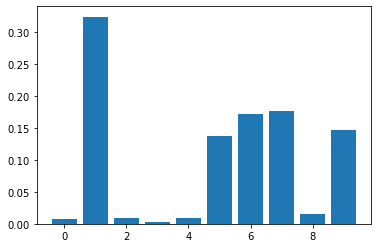

0.2484591646423454

In [247]:


## RUN RANDOM FOREST

# decision tree for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size = 0.2, random_state = 0)


# define the model
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)


# fit the model
regressor.fit(X_train, y_train)

# get importance
importance = regressor.feature_importances_

#summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
# MULTILEVEL MODEL  (TRIED IN R)

In [312]:
## SAVE
x_19.to_csv('x_19_dataprep2.csv', index=False)
x_demog.to_csv('x_demog_dataprep2.csv', index=False)
x_19_demog2.to_csv('x_19_demog2_dataprep2.csv', index=False)
datas2.to_csv('datas_dataprep2.csv', index=False)
data_all3.to_csv('data_all3__dataprep2.csv', index=False)
selected_features.to_csv("selected_feat.csv", index=False)